In [1]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [4]:
# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [5]:
# 데이터 노이즈 특성 추가
# 30개는 원본 특성, 다음 40개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

In [6]:
X = X_w_noise  # 입력
y = cancer.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [7]:
## 학습 세트에 적용
X_train_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_train_selected.shape)

X_train.shape: (284, 70)
X_train_selected.shape (284, 35)


In [8]:
import matplotlib.pyplot as plt

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False  True False False False False False  True False False False
 False False False False  True False False False False  True False False
  True False False False  True False False False  True  True]


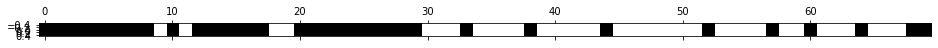

In [9]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [10]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성 사용 : 0.940
선택된 일부 특성 사용 : 0.923
